In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\census_income.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.shape

(32560, 15)

In [6]:
#We will check null values
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
#No null values in any of the columns
#The label here is Income, so we check on the values of each output in loan status
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [8]:
#We have 2 education columns, we will drop the one which has text.
data = data.drop(columns = ['Education'])
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
data['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [10]:
data['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [11]:
#Both capital gain and capital loss has 0 as most of the values, so we will delete both the columns since it wont have much of an impact
data = data.drop(columns = ['Capital_loss','Capital_gain'])
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [12]:
#We will drop the marital status also since it doesnt have an impact on income
data = data.drop(columns = ['Marital_status'])
data.head()

,Age,Workclass,Fnlwgt,Education_num,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,7,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,13,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,14,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [13]:
#We will drop the relationship, race and Sex also since it doesnt have an impact on income
data = data.drop(columns = ['Relationship','Race','Sex'])
data.head()

,Age,Workclass,Fnlwgt,Education_num,Occupation,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Exec-managerial,13,United-States,<=50K
1,38,Private,215646,9,Handlers-cleaners,40,United-States,<=50K
2,53,Private,234721,7,Handlers-cleaners,40,United-States,<=50K
3,28,Private,338409,13,Prof-specialty,40,Cuba,<=50K
4,37,Private,284582,14,Exec-managerial,40,United-States,<=50K


In [14]:
data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [16]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [17]:
#SO we will drop these columns too since it doesnt have an impact on income
data = data.drop(columns = ['Native_country','Occupation','Workclass'])
data.head()

,Age,Fnlwgt,Education_num,Hours_per_week,Income
0,50,83311,13,13,<=50K
1,38,215646,9,40,<=50K
2,53,234721,7,40,<=50K
3,28,338409,13,40,<=50K
4,37,284582,14,40,<=50K


In [18]:
data.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [23]:
X = data.drop(columns=['Income'])
y = data['Income']

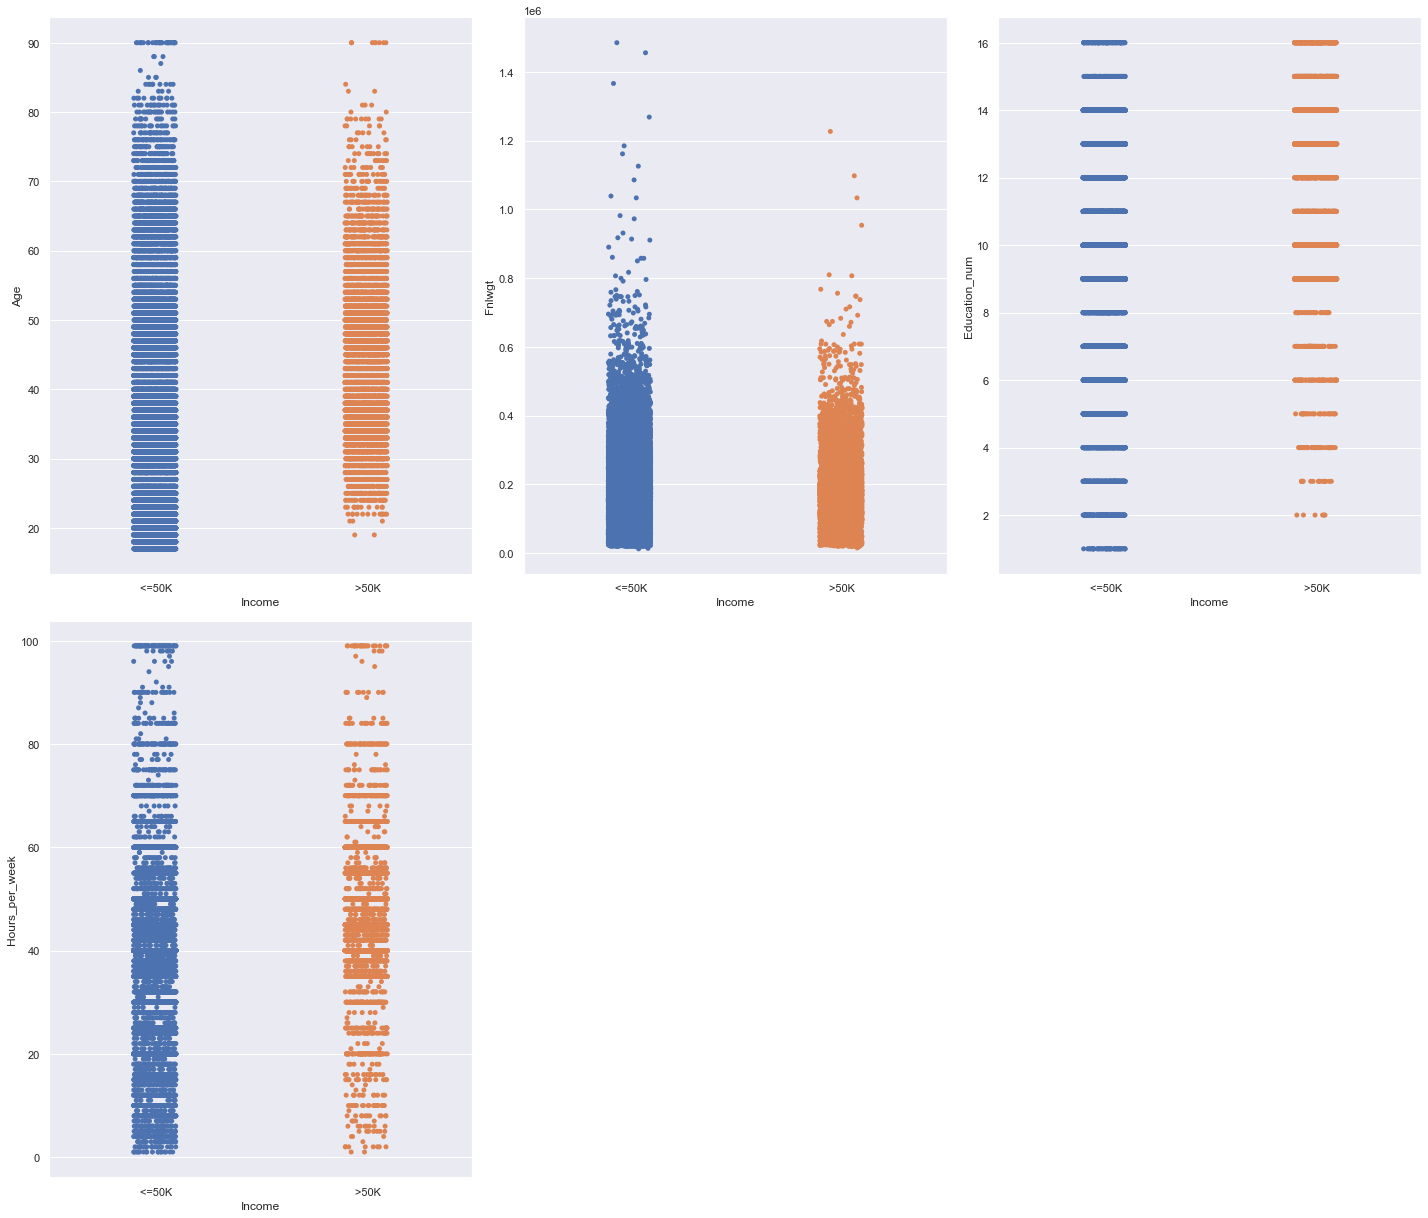

In [24]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9:
        ax =plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [25]:
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,1.011085,Age
1,1.007623,Fnlwgt
2,1.024717,Education_num
3,1.026713,Hours_per_week


In [ ]:
#all vif values are less than 5. So there is no multicollinearity

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [28]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Lets see how well our model performs on the test dataset

In [29]:
y_pred = log_reg.predict(x_test)

In [30]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7829238329238329

# Confusion metrix

In [31]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5729,  431],
       [1336,  644]], dtype=int64)

In [32]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [33]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7829238329238329

In [34]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9300324675324675

In [35]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.810898796886058

In [36]:
#F1 score
F1_score = 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8663894139886578

# KNN Model

In [38]:
#Lets fit the data into Knn model and see how well it performs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn.predict(x_test)

In [40]:
knn.score(x_train,y_train)

0.8371826371826372

In [41]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.768058968058968


In [ ]:
#lets try to increase accuracy by using hyperparameter tuning

In [42]:
param_grid = {'algorithm' : ['ball_tree','kd_tree','brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [43]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [44]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.747, total=   1.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.762, total=   1.2s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.755, total=   1.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.752, total=   1.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.764, total=   1.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.764, total=   1.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.773, total=   1.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.769, total=   1.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.766, total= 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed: 21.9min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [45]:
#Lets see the best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 12}

In [46]:
#we will use these parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 18, n_neighbors = 12)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [48]:
knn.score(x_train,y_train)

0.8147420147420148

In [49]:
knn.score(x_test,y_test)

0.7883292383292383

# We have a much better score in KNN model

# Random forest model

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rand_clf = RandomForestClassifier(random_state=41)

In [52]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [53]:
rand_clf.score(x_test,y_test)

0.7567567567567568

In [ ]:
# The score is less compared to KNN model and logistic regression

# So the best model we have built is of KNN model which is better after hyper parameter tuning. So we will save that model

In [57]:
import pickle
Census_income = 'finalized_model.pickle'
pickle.dump(knn,open(Census_income,'wb'))

# Saved the model